In [1]:
from math import sqrt
from scipy.fft import fft
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

import numpy as np
from scipy.ndimage import maximum_filter

from utils import *

In [2]:
lamda = 0.2
min_distance = 0.1
t = 50
nbSources = 5
snr = 10

fft_size = 256

# theta = np.random.rand(nbSources) * np.pi / 2
# phi = np.random.rand(nbSources) * np.pi

phi = np.array([2.74827173, 1.21801220, 2.12385516, 1.41384436, 0.25994850])
theta = np.array([0.84033229, 0.50972682, 1.07665572, 0.84576672, 0.31396609])

signal = (np.random.randn(nbSources, t) + 1j * np.random.randn(nbSources, t)) / sqrt(2)

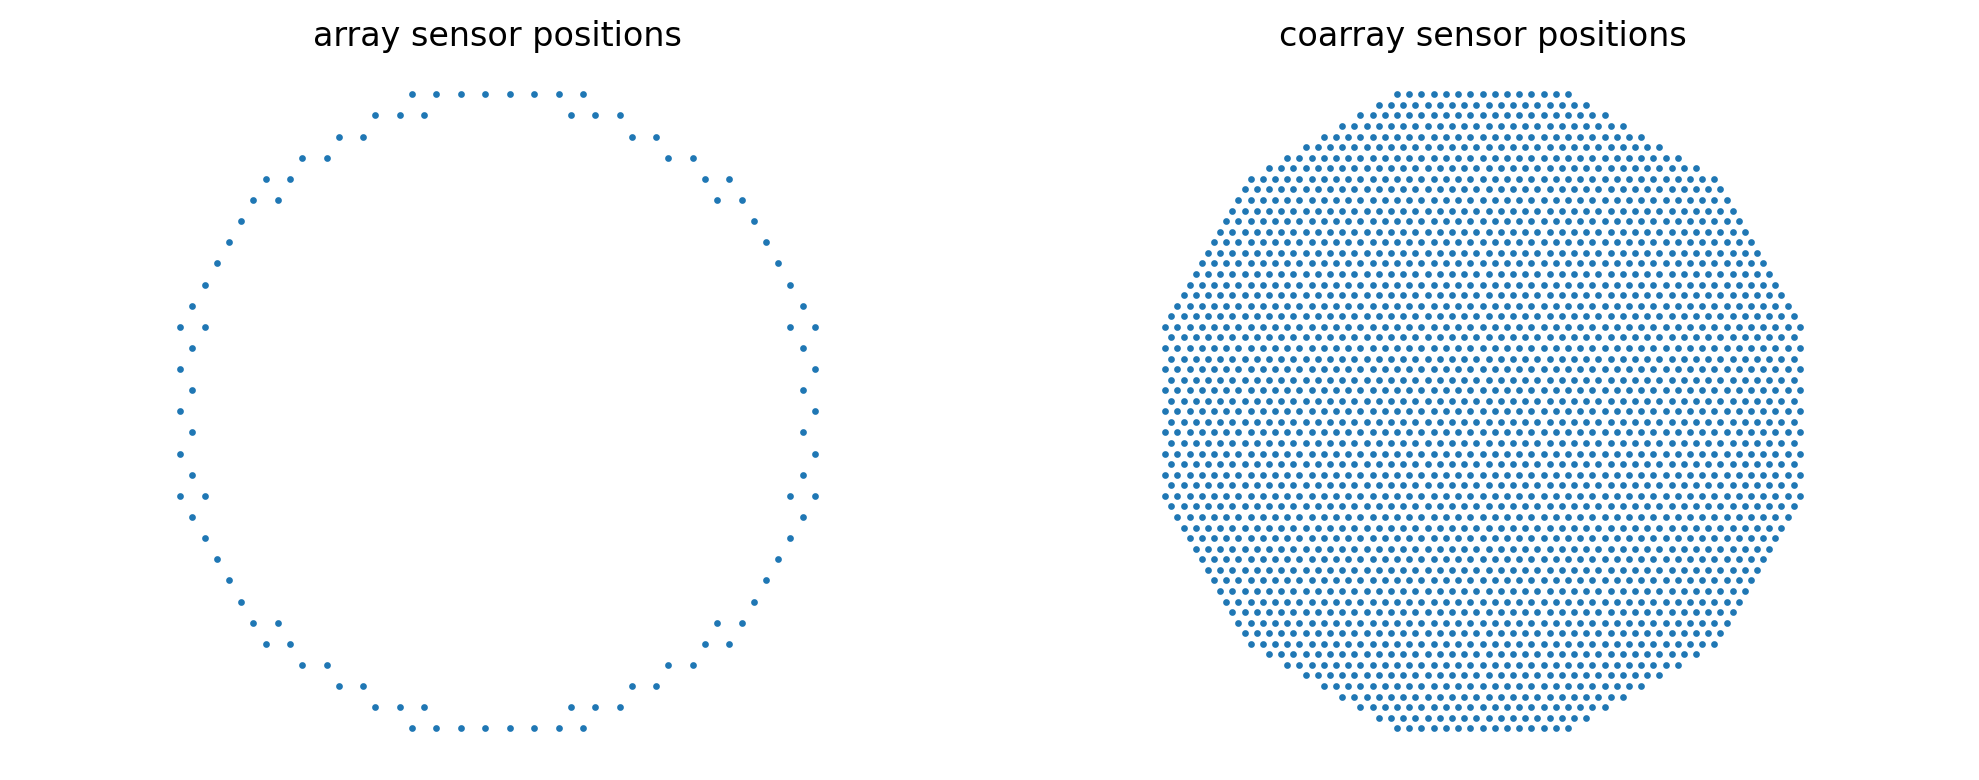

In [3]:
HA = HexagonalArray(lamda=lamda, min_distance=lamda/sqrt(3))
HA.build_coarray()
HA.build_array_manifold()
HA.plot(savename="hex");

In [4]:
len(HA.pos_coarray_set)

2575

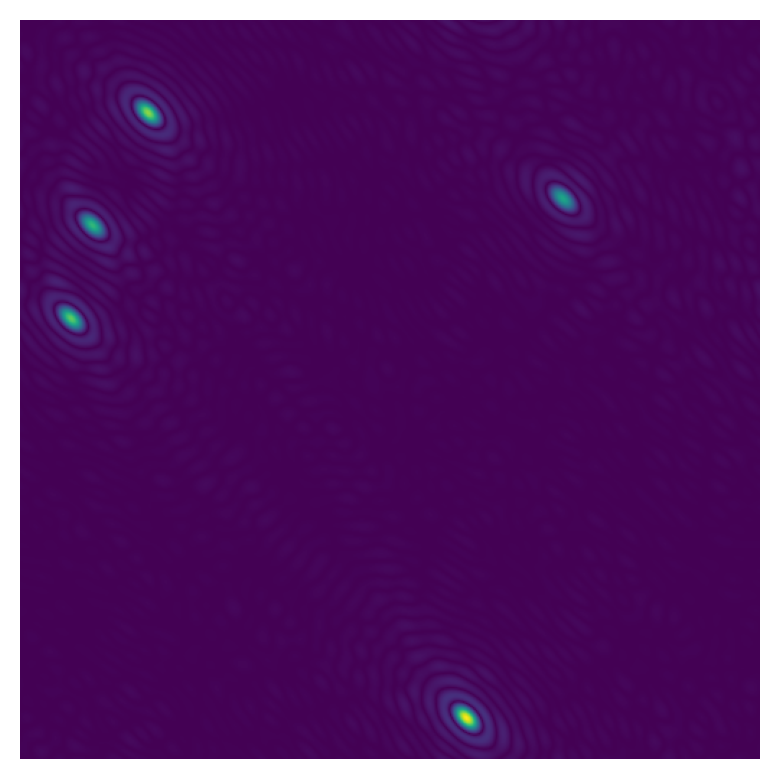

In [5]:
noise_ha = (np.random.randn(HA.nbSensors, t) + 1j * np.random.randn(HA.nbSensors, t)) / sqrt(2) * sqrt(nbSources) * 10 ** (-snr/20)
X_ha = HA.get_steering_vector(phi, theta) @ signal + noise_ha
estimated_phi_ha_fft, estimated_theta_ha_fft = HA.estimate_doa_fft(X_ha, nbSources, fft_size, fft_size, True)
estimated_phi_ha_music, estimated_theta_ha_music = HA.estimate_doa_music(X_ha, nbSources)
plt.savefig("test_ha.pdf", bbox_inches='tight', pad_inches=0)

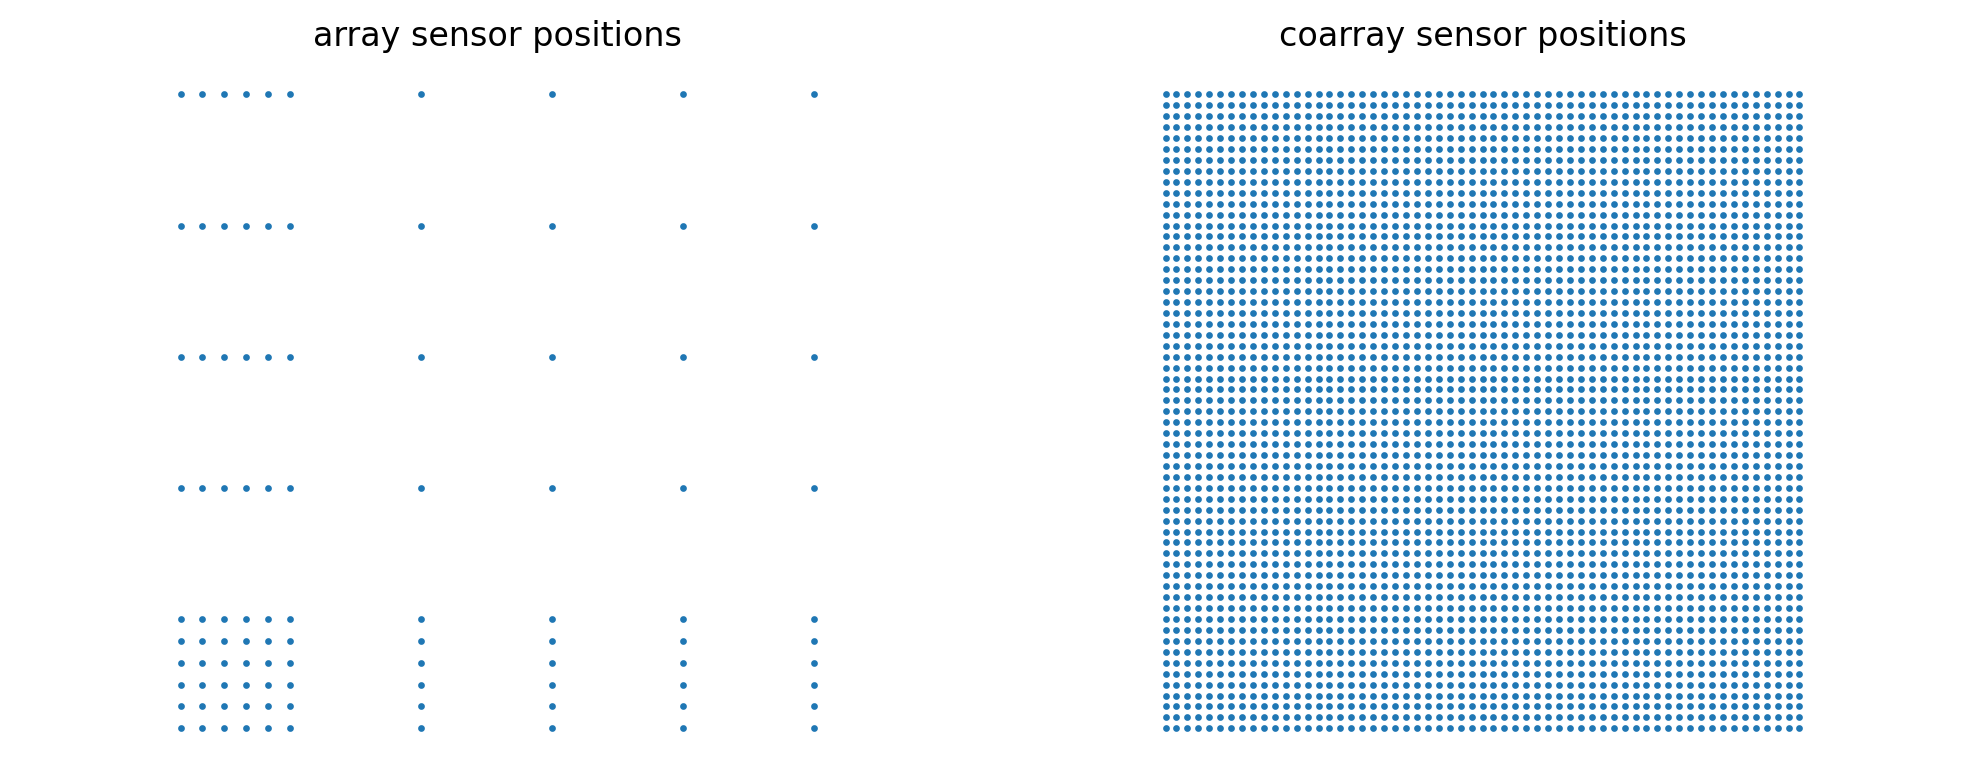

In [6]:
NA = NestedArray2D(lamda=lamda, min_distance=min_distance, levels_horizontal=[5, 5], levels_vertical=[5, 5])
NA.build_coarray()
NA.build_array_manifold()
NA.plot()

In [7]:
len(NA.pos_coarray_set)

3481

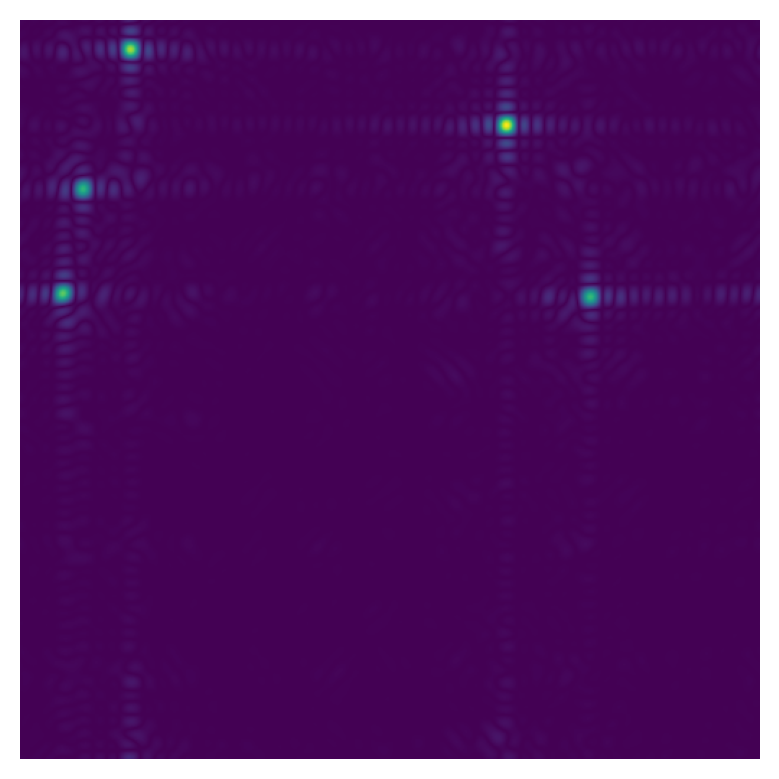

In [8]:
noise_na = (np.random.randn(NA.nbSensors, t) + 1j * np.random.randn(NA.nbSensors, t)) / sqrt(2) * sqrt(nbSources) * 10 ** (-snr/20)
X_na = NA.get_steering_vector(phi, theta) @ signal + noise_na
estimated_phi_na_fft, estimated_theta_na_fft = NA.estimate_doa_fft(X_na, nbSources, fft_size, fft_size, True)
estimated_phi_na_music, estimated_theta_na_music = NA.estimate_doa_music(X_na, nbSources)
plt.savefig("test_na.pdf",bbox_inches='tight', pad_inches=0)

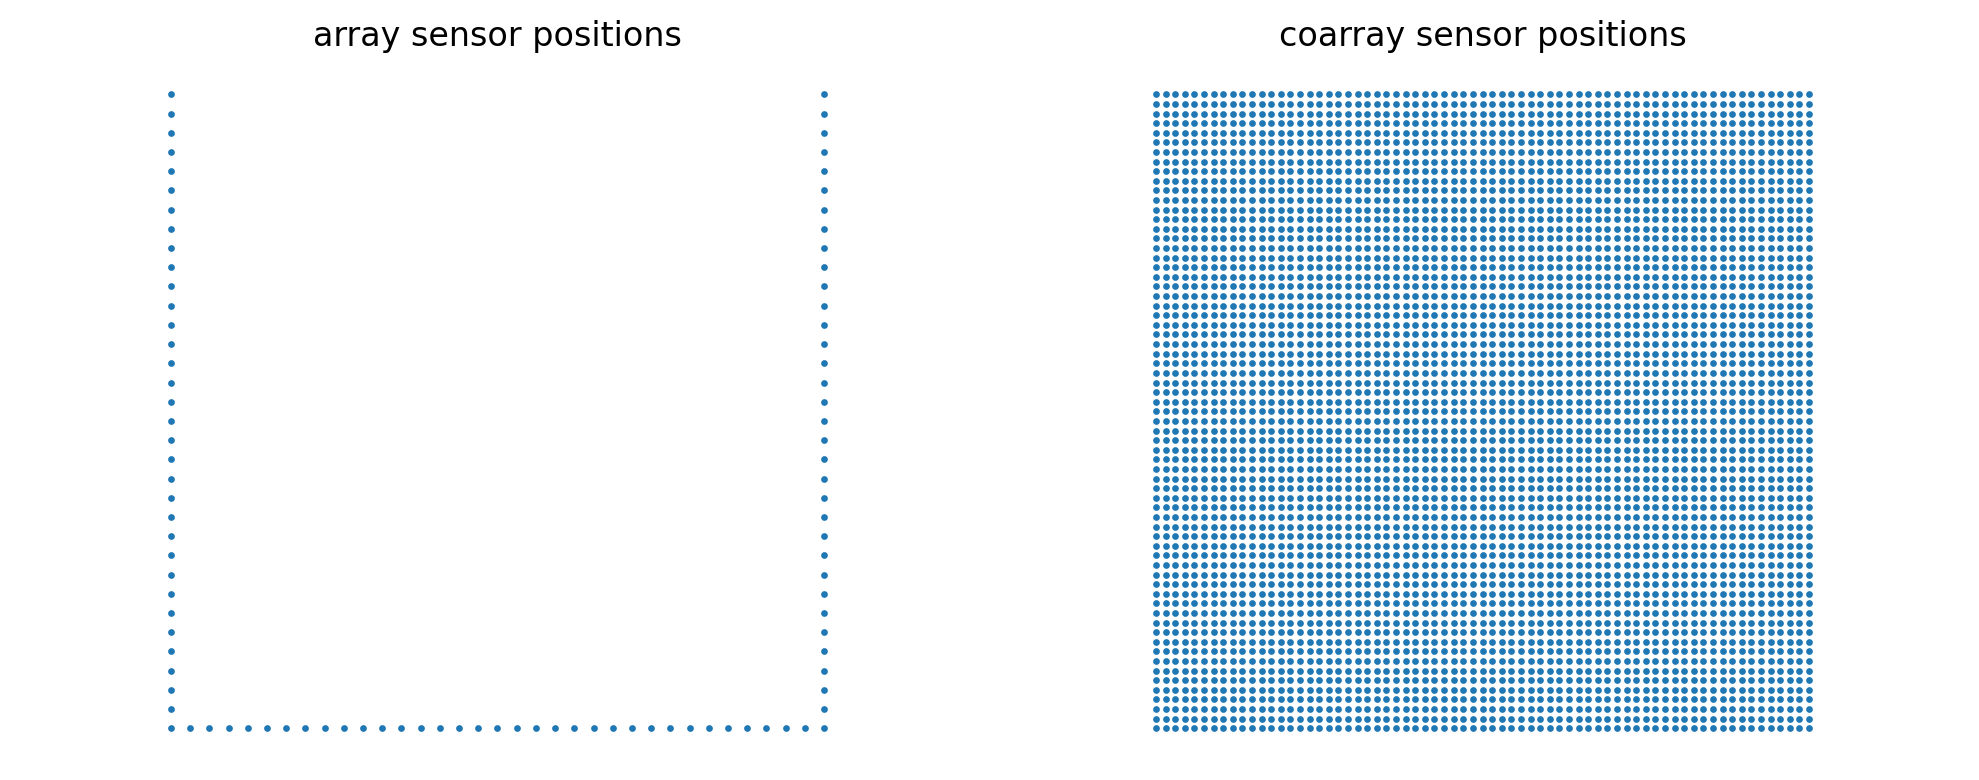

In [9]:
OB = OpenBoxArray(lamda=lamda, min_distance=min_distance, size_horizontal=35, size_vertical=34)
OB.build_coarray()
OB.build_array_manifold()
OB.plot()

In [10]:
len(OB.pos_coarray_set)

4623

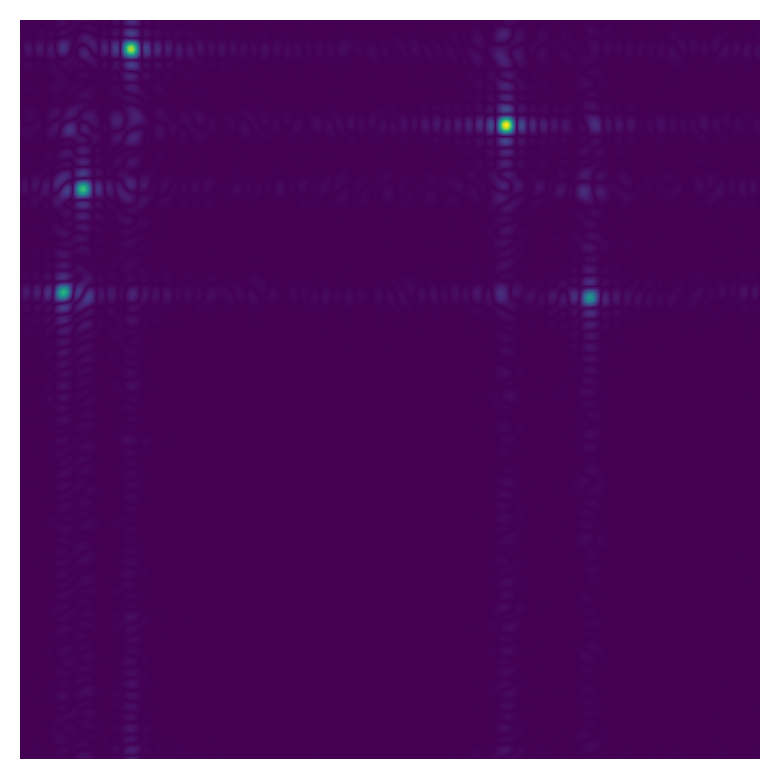

In [11]:
noise_ob = (np.random.randn(OB.nbSensors, t) + 1j * np.random.randn(OB.nbSensors, t)) / sqrt(2) * sqrt(nbSources) * 10 ** (-snr/20)
X_ob = OB.get_steering_vector(phi, theta) @ signal + noise_ob
estimated_phi_ob_fft, estimated_theta_ob_fft = OB.estimate_doa_fft(X_ob, nbSources, fft_size, fft_size, True)
estimated_phi_ob_music, estimated_theta_ob_music = OB.estimate_doa_music(X_ob, nbSources)
plt.savefig("test_ob.pdf",bbox_inches='tight', pad_inches=0)

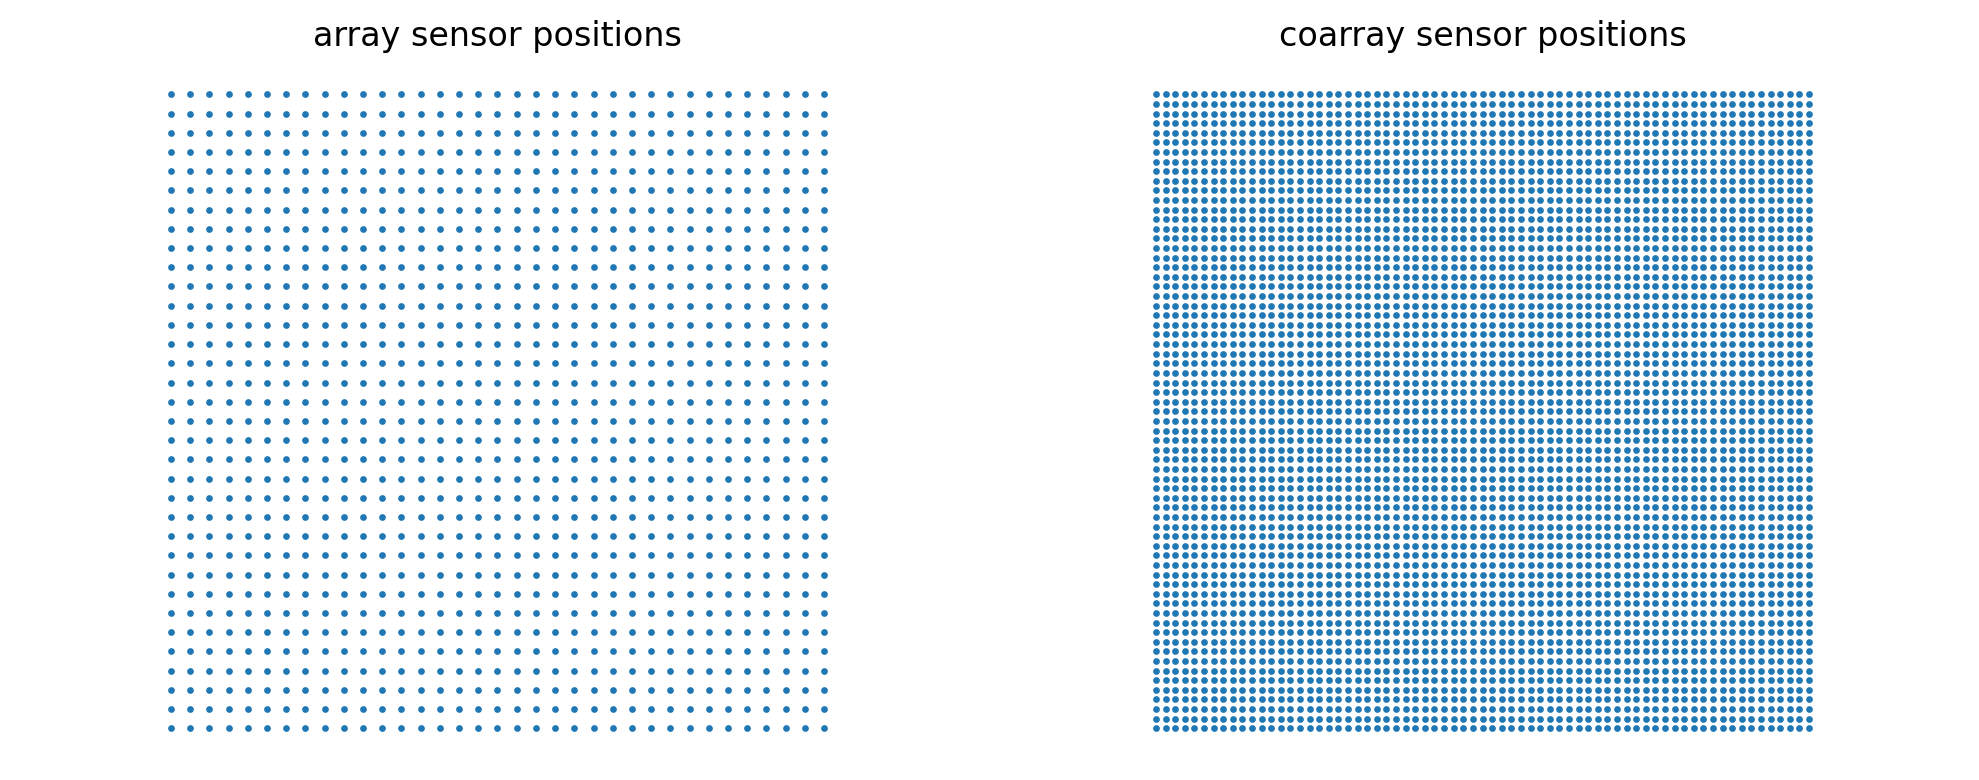

In [12]:
URA = UniformRectangularArray(lamda=lamda, min_distance=min_distance, size_horizontal=35, size_vertical=34)
URA.build_coarray()
URA.build_array_manifold()
URA.plot()

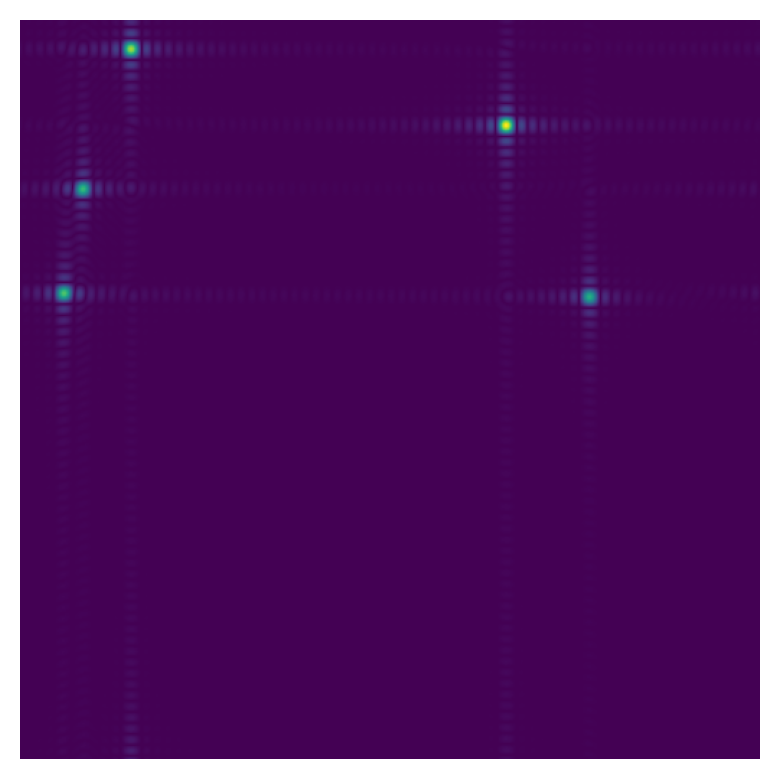

In [13]:
noise_ura = (np.random.randn(URA.nbSensors, t) + 1j * np.random.randn(URA.nbSensors, t)) / sqrt(2) * sqrt(nbSources) * 10 ** (-snr/20)
X_ura = URA.get_steering_vector(phi, theta) @ signal + noise_ura
estimated_phi_ura_fft, estimated_theta_ura_fft = URA.estimate_doa_fft(X_ura, nbSources, fft_size, fft_size, True)
plt.savefig("test_ura.pdf",bbox_inches='tight', pad_inches=0)

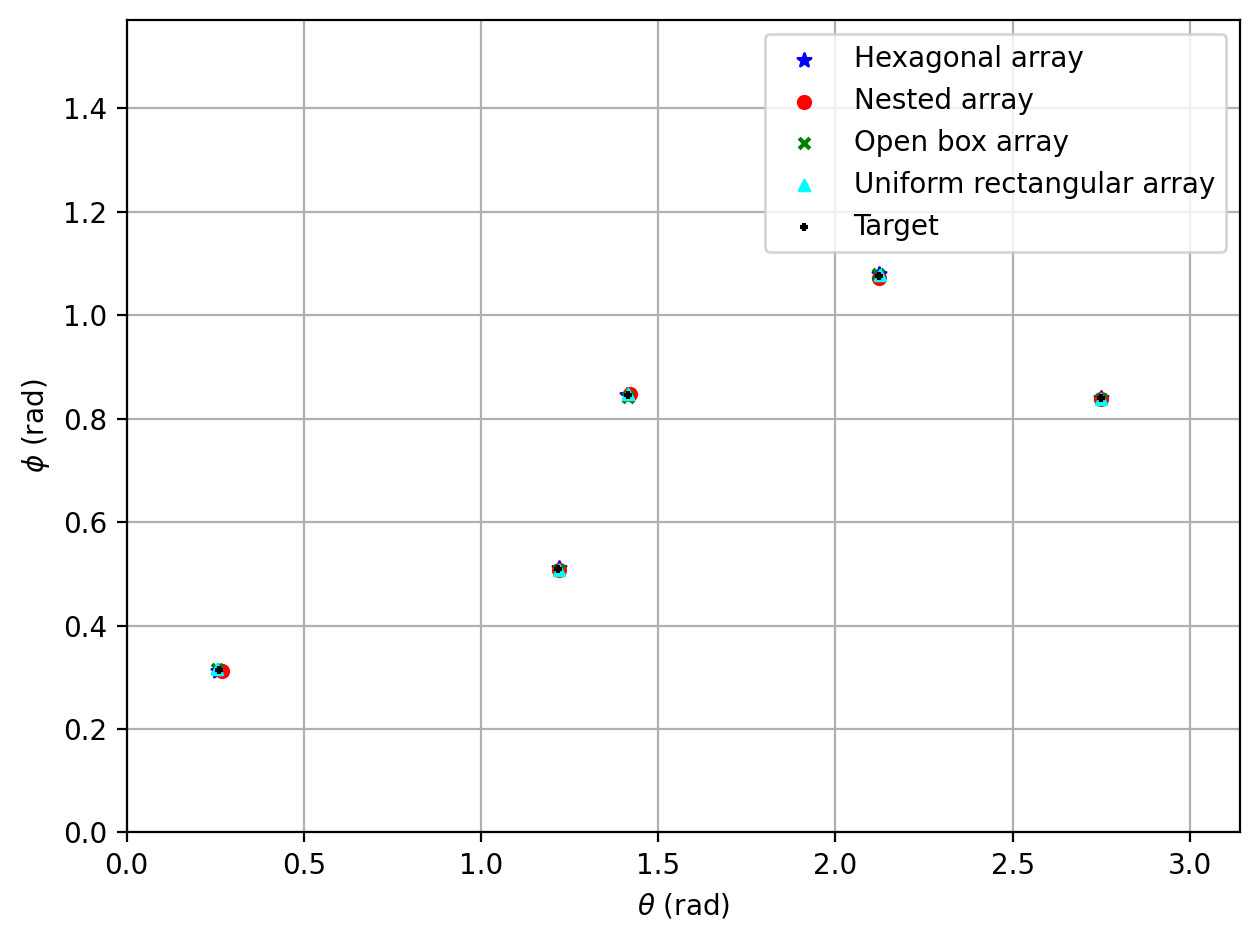

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Your scatter plots
plt.scatter(estimated_phi_ha_fft, estimated_theta_ha_fft, marker='*', color='blue', s=25, label='Hexagonal array')
# plt.scatter(estimated_theta_ha_music, estimated_phi_ha_music, marker='*', color='green', s=7, label='Hexagonal Array - MUSIC')
plt.scatter(estimated_phi_na_fft, estimated_theta_na_fft, marker='o', color='red', s=20, label='Nested array')  
# plt.scatter(estimated_theta_na_music, estimated_phi_na_music, marker='o', color='cyan', s=7, label='Nested Array - MUSIC')  
plt.scatter(estimated_phi_ob_fft, estimated_theta_ob_fft, marker='x', color='green', s=15, label='Open box array')  
# plt.scatter(estimated_theta_ob_music, estimated_phi_ob_music, marker='x', color='magenta', s=7, label='Open Box Array - MUSIC') 
plt.scatter(estimated_phi_ura_fft, estimated_theta_ura_fft, marker='^', color='cyan', s=15, label='Uniform rectangular array') 

plt.scatter(phi, theta, marker='+', color='black', s=10, label='Target')

plt.xlim(0, np.pi) 
plt.ylim(0, np.pi/2)  

plt.xlabel(r'$\theta$ (rad)')
plt.ylabel(r'$\phi$ (rad)')

plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.savefig("visual_test.pdf")
plt.show()